<a href="https://colab.research.google.com/github/Annyatoma/Intrusion-Detection-System/blob/main/Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn keras tensorflow

In [2]:
import pandas as pd
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label']
df = pd.read_csv('/content/KDDTrain+.csv')
df = df.dropna()


In [3]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns
encoder = LabelEncoder()
df['protocol_type'] = encoder.fit_transform(df['protocol_type'])
df['service'] = encoder.fit_transform(df['service'])
df['flag'] = encoder.fit_transform(df['flag'])


In [4]:
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)
X = df.drop('label', axis=1)
y = df['label']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9658 - loss: 0.0949
Epoch 2/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9913 - loss: 0.0256
Epoch 3/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9930 - loss: 0.0215
Epoch 4/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9931 - loss: 0.0192
Epoch 5/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9938 - loss: 0.0172
Epoch 6/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9950 - loss: 0.0147
Epoch 7/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9948 - loss: 0.0143
Epoch 8/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9947 - loss: 0.0144
Epoch 9/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9949 - loss: 0.0141
Epoch 10/10
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9956 - loss: 0.0129


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



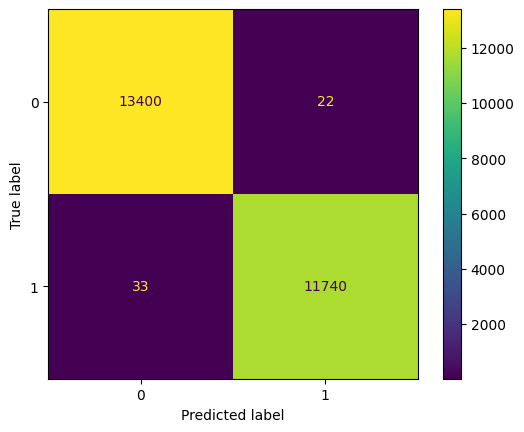

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9942 - loss: 0.0214
Test Accuracy: 0.9938876628875732


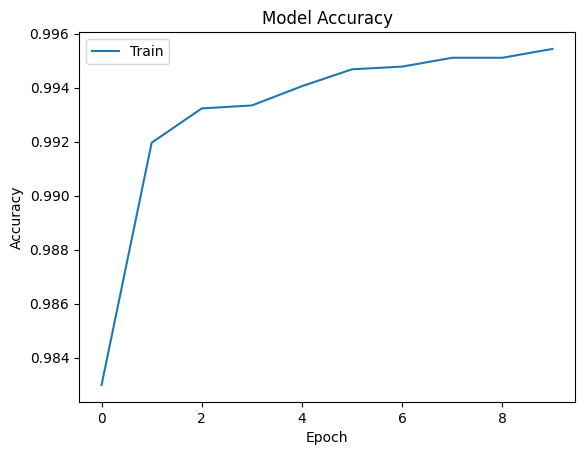

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


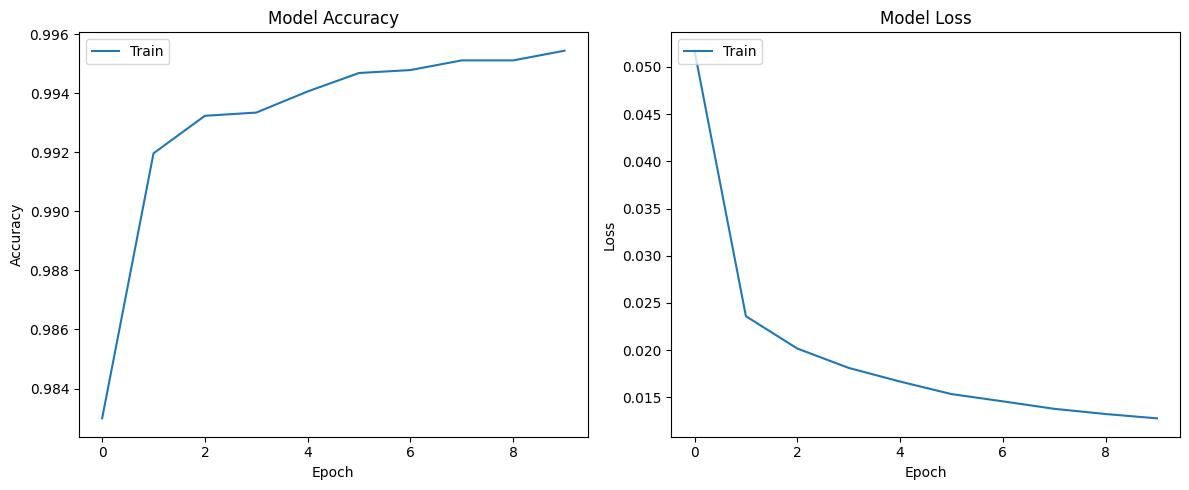

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train'], loc='upper left')

# Plot loss
axes[1].plot(history.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train'], loc='upper left')

plt.tight_layout()
plt.show()